# image Classification 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
artist_arts_len = {artist : len(os.listdir(f'./selected_artist/{artist}')) for artist in os.listdir('./selected_artist') if not artist.startswith(".")}

In [3]:
artist_arts_len

{'Alfred_Sisley': 260,
 'Francisco_Goya': 291,
 'Marc_Chagall': 239,
 'Paul_Gauguin': 311,
 'Paul_Klee': 188,
 'Rembrandt': 262,
 'Rene_Magritte': 194,
 'Titian': 256}

In [4]:
CLASS_NAMES= [artist for artist in os.listdir('./selected_artist') if not artist.startswith(".")]

In [5]:
def show_img_jupyter(img):
    image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.show()

In [6]:
def resizing_square(path, dim):
    origin_img = cv2.imread(path)
    return cv2.resize(origin_img, (dim, dim))

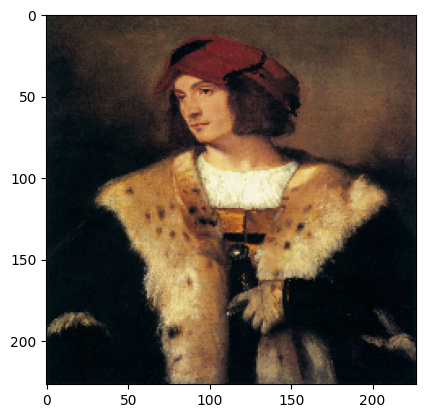

In [7]:
path = "./selected_artist/Titian/Titian_105.jpg"
show_img_jupyter(resizing_square(path, 227))

In [8]:
resizing_square(path, 227).shape

(227, 227, 3)

In [9]:
X = []
y = []
for artist in os.listdir('./selected_artist'):
    if artist.startswith("."):
        continue
    for art in os.listdir(f'./selected_artist/{artist}'):
        if artist.startswith("."):
            continue
        X.append(resizing_square(path, 224))
        y.append(artist)

In [10]:
X = np.array(X, dtype=float)
y = np.array(y)

def one_hot(array):
    unique, inverse = np.unique(array, return_inverse=True)
    onehot = np.eye(unique.shape[0])[inverse]
    return onehot

y = y.reshape(-1,1)
y = one_hot(y)

In [11]:
import tensorflow as tf
from tensorflow import keras

def AlexNetModel(input_shape = (224, 224, 3), activ_Conv2D = 'relu', activ_dense = 'relu', activ_output = 'softmax', droprate = 0.5, num_classes = 8):
    model = keras.models.Sequential([keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation=activ_Conv2D, input_shape=input_shape, name="Block1_Conv"),
                                     keras.layers.BatchNormalization(name="Block1_BatchNorm"),
                                     keras.layers.MaxPool2D(pool_size=(2,2), name="Block1_Pool"),
                                     keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation=activ_Conv2D, padding="same", name="Block2_Conv"),
                                     keras.layers.BatchNormalization(name="Block2_BatchNorm"),
                                     keras.layers.MaxPool2D(pool_size=(3,3), name="Block2_Pool"),
                                     keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation=activ_Conv2D, padding="same", name="Block3_Conv1"),
                                     keras.layers.BatchNormalization(name="Block3_BatchNorm1"),
                                     keras.layers.Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), activation=activ_Conv2D, padding="same", name="Block3_Conv2"),
                                     keras.layers.BatchNormalization(name="Block3_BatchNorm2"),
                                     keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation=activ_Conv2D, padding="same", name="Block3_Conv3"),
                                     keras.layers.BatchNormalization(name="Block3_BatchNorm3"),
                                     keras.layers.MaxPool2D(pool_size=(2,2), name="Block3_Pool"),
                                     keras.layers.Flatten(name="Flatten_layer"),
                                     keras.layers.Dense(4096, activation=activ_dense, name="fc1"),
                                     keras.layers.Dropout(droprate, name="Dropout1"),
                                     keras.layers.Dense(4096, activation=activ_dense, name="fc2"),
                                     keras.layers.Dropout(droprate, name="Dropout2"),
                                     keras.layers.Dense(num_classes, activation=activ_output, name="Prediction")
                                    ])
    return model

def VGG16Model(input_shape = (224, 224, 3), activ_Conv2D = 'relu', activ_dense = 'relu', activ_output = 'softmax', droprate = 0.5, num_classes = 8):
    model = keras.models.Sequential([keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation=activ_Conv2D, input_shape=input_shape,  padding="same", name="Block1_Conv1"),
                                     keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation=activ_Conv2D, padding="same", name="Block1_Conv2"),
                                     keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), name="Block1_pool"),
                                     keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation=activ_Conv2D, padding="same", name="Block2_Conv1"),
                                     keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation=activ_Conv2D, padding="same", name="Block2_Conv2"),
                                     keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), name="Block2_pool"),
                                     keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation=activ_Conv2D, padding="same", name="Block3_Conv1"),
                                     keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation=activ_Conv2D, padding="same", name="Block3_Conv2"),
                                     keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation=activ_Conv2D, padding="same", name="Block3_Conv3"),
                                     keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), name="Block3_pool"),
                                     keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation=activ_Conv2D, padding="same", name="Block4_Conv1"),
                                     keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation=activ_Conv2D, padding="same", name="Block4_Conv2"),
                                     keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation=activ_Conv2D, padding="same", name="Block4_Conv3"),
                                     keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), name="Block4_pool"),
                                     keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation=activ_Conv2D, padding="same", name="Block5_Conv1"),
                                     keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation=activ_Conv2D, padding="same", name="Block5_Conv2"),
                                     keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation=activ_Conv2D, padding="same", name="Block5_Conv3"),
                                     keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), name="Block5_pool"),
                                     keras.layers.Flatten(name="Flatten_layer"),
                                     keras.layers.Dense(4096, activation=activ_dense, name="fc1"),
                                     keras.layers.Dense(4096, activation=activ_dense, name="fc2"),
                                     keras.layers.Dense(num_classes, activation=activ_output, name="Prediction")
                                    ])
    return model

def VGG19Model(input_shape = (224, 224, 3), activ_Conv2D = 'relu', activ_dense = 'relu', activ_output = 'softmax', droprate = 0.5, num_classes = 8):
    model = keras.models.Sequential([keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation=activ_Conv2D, input_shape=input_shape,  padding="same", name="Block1_Conv1"),
                                     keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation=activ_Conv2D, padding="same", name="Block1_Conv2"),
                                     keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), name="Block1_pool"),
                                     keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation=activ_Conv2D, padding="same", name="Block2_Conv1"),
                                     keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation=activ_Conv2D, padding="same", name="Block2_Conv2"),
                                     keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), name="Block2_pool"),
                                     keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation=activ_Conv2D, padding="same", name="Block3_Conv1"),
                                     keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation=activ_Conv2D, padding="same", name="Block3_Conv2"),
                                     keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation=activ_Conv2D, padding="same", name="Block3_Conv3"),
                                     keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation=activ_Conv2D, padding="same", name="Block3_Conv4"),
                                     keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), name="Block3_pool"),
                                     keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation=activ_Conv2D, padding="same", name="Block4_Conv1"),
                                     keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation=activ_Conv2D, padding="same", name="Block4_Conv2"),
                                     keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation=activ_Conv2D, padding="same", name="Block4_Conv3"),
                                     keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation=activ_Conv2D, padding="same", name="Block4_Conv4"),
                                     keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), name="Block4_pool"),
                                     keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation=activ_Conv2D, padding="same", name="Block5_Conv1"),
                                     keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation=activ_Conv2D, padding="same", name="Block5_Conv2"),
                                     keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation=activ_Conv2D, padding="same", name="Block5_Conv3"),
                                     keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation=activ_Conv2D, padding="same", name="Block5_Conv4"),
                                     keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), name="Block5_pool"),
                                     keras.layers.Flatten(name="Flatten_layer"),
                                     keras.layers.Dense(4096, activation=activ_dense, name="fc1"),
                                     keras.layers.Dense(4096, activation=activ_dense, name="fc2"),
                                     keras.layers.Dense(num_classes, activation=activ_output, name="Prediction")
                                    ])
    return model

In [14]:
AlexNet = AlexNetModel()

metrics = [
    keras.metrics.Accuracy(name='acc')
]

AlexNet.compile(
    optimizer=keras.optimizers.Adam(0.1), 
    loss=tf.keras.losses.CategoricalCrossentropy(), 
    metrics=metrics
)

history = AlexNet.fit(
    x=X,
    y=y,
    callbacks=callbacks,
    batch_size=128,
    epochs=10,
    verbose=1
)

Epoch 1/10
16/16 [==============================] - 28s 2s/step - loss: 229005.2344 - acc: 0.6267
Epoch 2/10
16/16 [==============================] - 27s 2s/step - loss: 246.9521 - acc: 0.1769
Epoch 3/10
16/16 [==============================] - 27s 2s/step - loss: 41.3545 - acc: 0.0224
Epoch 4/10
 1/16 [>.............................] - ETA: 25s - loss: 2.0806 - acc: 0.0000e+00

KeyboardInterrupt: 